In [5]:
import pandas as pd
import numpy as np
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import inspect

from sqlalchemy import create_engine, func

engine = create_engine('sqlite:///../data/Aquastat.sqlite')

Base=automap_base()
Base.prepare(engine, reflect = True)
inspector = inspect(engine)
inspector.get_table_names()
session=Session(engine)
conn = engine.connect()

In [7]:
conn = engine.connect()
data = conn.execute('SELECT country, water_stress, gii FROM Aquastat').fetchall()
df = pd.DataFrame().from_records(data,columns=[['country', 'hdi','nri']])
df2 = df.groupby('country').mean().reset_index()


In [185]:
d = {}
for a, b, c in data:
    d.setdefault(a, []).append(b)
e = {}
for a, b, c in data:
    e.setdefault(a, []).append(c)
f = {'hdi':d, 'nri':e}


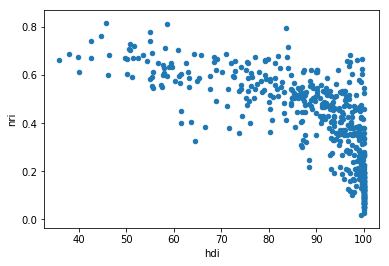

In [279]:
import matplotlib.pyplot as plt
df.plot(kind='scatter', x='hdi', y='nri')
#plt.ylim(0,200)
#plt.xlim(1,100)
plt.show()


In [280]:
#gii and safe water

In [24]:
df2 = df.groupby('country').mean()

In [27]:
dict = df2.to_dict

In [41]:
dict

<bound method DataFrame.to_dict of                                                    hdi       nri
country                                                         
Afghanistan                                  43.670000  0.718800
Albania                                       7.768000  0.284467
Algeria                                      76.140000  0.522775
Andorra                                            NaN       NaN
Angola                                        0.647700       NaN
Antigua and Barbuda                           9.135000       NaN
Argentina                                     5.841000  0.391400
Armenia                                      55.404000  0.376150
Australia                                     5.151600  0.135275
Austria                                       7.858667  0.115700
Azerbaijan                                   51.887500  0.303000
Bahamas                                            NaN  0.297900
Bahrain                                     205.800000 

In [8]:
df2[]

,country,hdi,nri
0,Afghanistan,43.670000,0.718800
1,Albania,7.768000,0.284467
2,Algeria,76.140000,0.522775
3,Andorra,NaN,NaN
4,Angola,0.647700,NaN
5,Antigua and Barbuda,9.135000,NaN
6,Argentina,5.841000,0.391400
7,Armenia,55.404000,0.376150
8,Australia,5.151600,0.135275
9,Austria,7.858667,0.115700
